In [1]:
from pyntcloud.io import read_ply
from pyntcloud.io import write_npz
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import trimesh

In [2]:
def plot_pcd(x,y,z):
    fig = plt.figure(figsize=(10,9))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,y,z,marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

In [9]:
def mesh_to_pcd(filename,data,dtype):
    if dtype =='stl':
        mesh = np.asarray(data.faces)
        points_xyz = np.asarray(data.vertices)
        v1_xyz = points_xyz[mesh[:,0]]
        v2_xyz = points_xyz[mesh[:,1]]
        v3_xyz = points_xyz[mesh[:,2]]
        high = mesh
    else :
        
        points_xyz = data['points'][['x','y','z']].values
        v1_xyz = points_xyz[data['mesh']['v1']]
        v2_xyz = points_xyz[data['mesh']['v2']]
        v3_xyz = points_xyz[data['mesh']['v3']]
        high =data['mesh']
        
    n = 2048
    
    naive_random_indices = np.random.randint(low=0, high=high.shape[0],size=n)

    def triangle_area_multi(v1,v2,v3):
        return 0.5*np.linalg.norm(np.cross(v2-v1,v3-v1),axis=1)

    areas = triangle_area_multi(v1_xyz,v2_xyz,v3_xyz)
    probabilities = areas/areas.sum()
    weighted_random_indices = np.random.choice(range(len(areas)),size=n,p=probabilities)

    v1_xyz = v1_xyz[weighted_random_indices]
    v2_xyz = v2_xyz[weighted_random_indices]
    v3_xyz = v3_xyz[weighted_random_indices]

    u = np.random.rand(n,1)
    v = np.random.rand(n,1)
    is_a_problem = u+v > 1
    u[is_a_problem] = 1 -u[is_a_problem]
    v[is_a_problem] = 1 -v[is_a_problem]
    w = 1-(u+v)

    result = pd.DataFrame()
    result_xyz = (v1_xyz*u)+(v2_xyz*v)+(w*v3_xyz)
    result_xyz = result_xyz.astype(np.float32)
    result["x"] = result_xyz[:,0]
    result["y"] = result_xyz[:,1]
    result["z"] = result_xyz[:,2]
    
    plot_pcd(result["x"],result["y"],result["z"])
    
    dst = './pcd_dataset/'
    if not(os.path.isdir(dst)):
            os.makedirs(os.path.join(dst))
            print('make directory! : ./pcd_dataset/')
    write_npz(filename[:-4]+'.npz',x=result["x"],y=result["y"],z=result["z"])
    print('save!')

In [10]:
src = '/home/lab1_ysy/3DCNN_PointNet/parts1006_dataset/stl_object/'

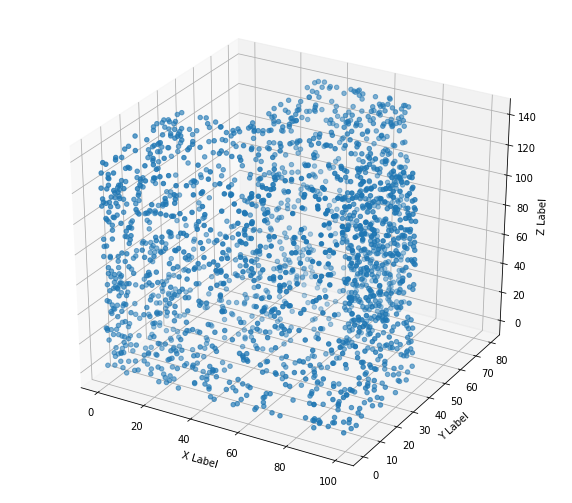

save!


In [11]:
filename = '636_SCYF-A100-B80-L140-C30-D40-E40.stl'
data =  trimesh.load(src+filename)
dtype = 'stl'
mesh_to_pcd(filename,data,dtype)

In [ ]:
pnt = np.load('./sample.npz')
pnt_x,pnt_y,pnt_z=pnt['x'],pnt['y'],pnt['z']
plot_pcd(pnt_x,pnt_y,pnt_z)